# Supernova Signal - 2
Demonstrating the `Supernova_Models` and `SN_plotter` modules. <br>
2 dimensional rate calculation can take about an hour for each model as it computes the rates at each (sampled) time and at each neutrino energy.

## Table of Contents
- [2D Rates](#rates)
- [Plotting](#plot-data)
    - [Recoil Energy Spectrum 1D](#recoil-spec2D)
    - [Recoil Energy Spectrum 2D](#recoil-spec2D)

# Read model compute 2D recoil rates<a class="anchor" id="rates"></a>

In [1]:
import multimessenger.supernova as sn
M30sn_model  = sn.Supernova_Models.SN_LightCurve()
M30sn_model.load_model_from_db(progenitor_mass = 30,
                               metallicity= 0.02,
                               time_of_revival = 100,)

Running.. Saving the Object..



*** Detector definition message ***
You are currently using the default XENON10 template detector.



Saved at /dali/lgrandi/melih/mma/data/Xenon_30-M_-0.02-Z_100-t_dist10.p!



---

In [3]:
import numpy as np
M30sn_model.get_recoil_spectra1D(rec_en = np.linspace(0,20,35), _force_calc=False)


This will take a minute
Truncating
Saving Xenon_30-M_-0.02-Z_100-t_dist10_Er0.0-20.0-35_t0-0-tf-10_1D.p...
Saved at /dali/lgrandi/melih/mma/data/Xenon_30-M_-0.02-Z_100-t_dist10_Er0.0-20.0-35_t0-0-tf-10_1D.p!



To obtain the spectra quickly, I'll sample only 10 energy values between 0 and 20. 

In [4]:
M30sn_model.get_recoil_spectra2D()


 This will take a while


  0%|          | 0/27 [00:00<?, ?it/s]

Saving Xenon_30-M_-0.02-Z_100-t_dist10_Er0.0-15.3-27_tstep1_dist10_2D.p...
Saved at /dali/lgrandi/melih/mma/data/Xenon_30-M_-0.02-Z_100-t_dist10_Er0.0-15.3-27_tstep1_dist10_2D.p!



### Plot the data<a class="anchor" id="plot-data"></a>

In [5]:
plotter = sn.SN_plotter.Plotter(M30sn_model)

See **Luminosity plots** and **Number Flux Plots** in the [previous notebook](Supernova_Signal-1.ipynb)

#### Recoil Energy Spectrum 1-D<a class="anchor" id="recoil-spec"></a>

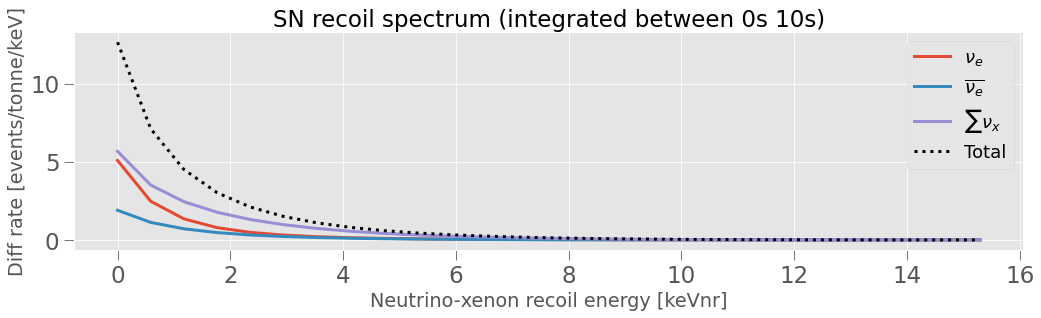

In [6]:
plotter.plot_recoil_spectra();

#### Recoil Energy Spectrum - 2D<a class="anchor" id="recoil-spec2D"></a>

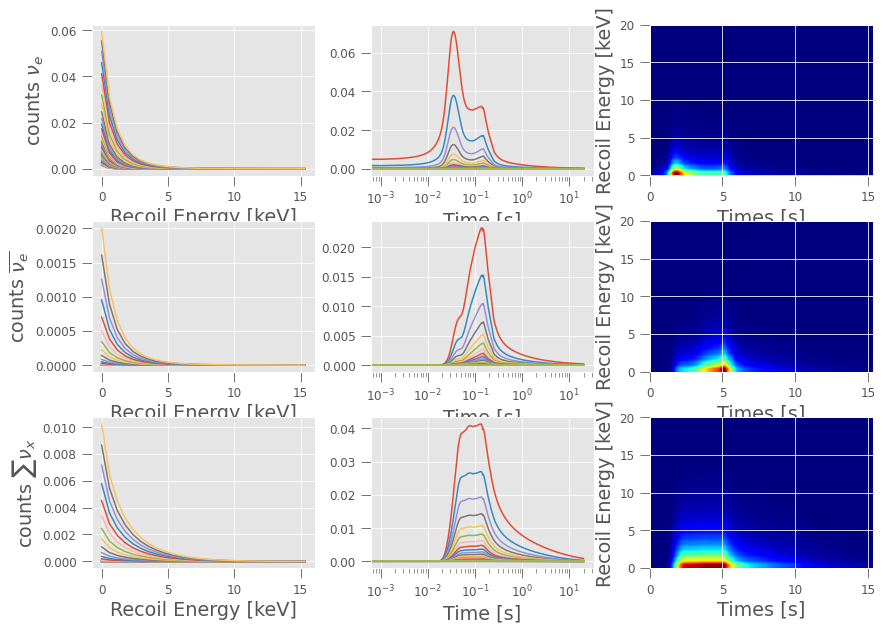

In [7]:
plotter.plot_recoil_spectra2D(integrated=False, figsize=(14,10));

The sum along both axis, between any given time interval can be plotted with the same <br>`plotter.plot_recoil_spectra2D(integrated=True, t0=0, tf=2);` <br>
if no `t0` or `tf` given, it integrates over the whole time interval

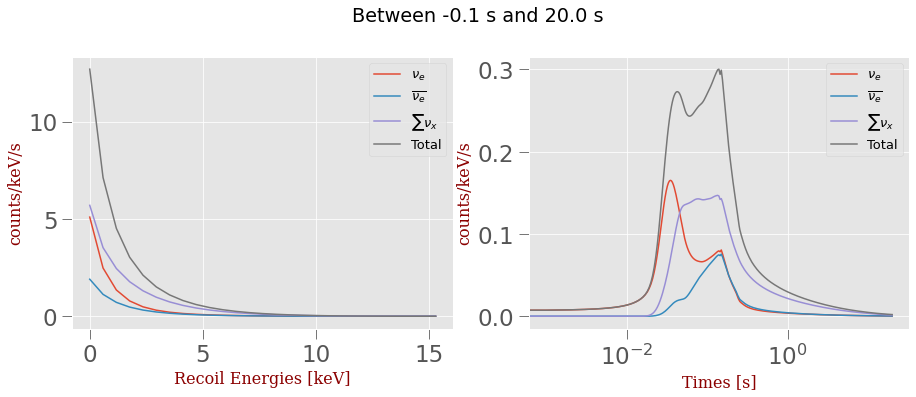

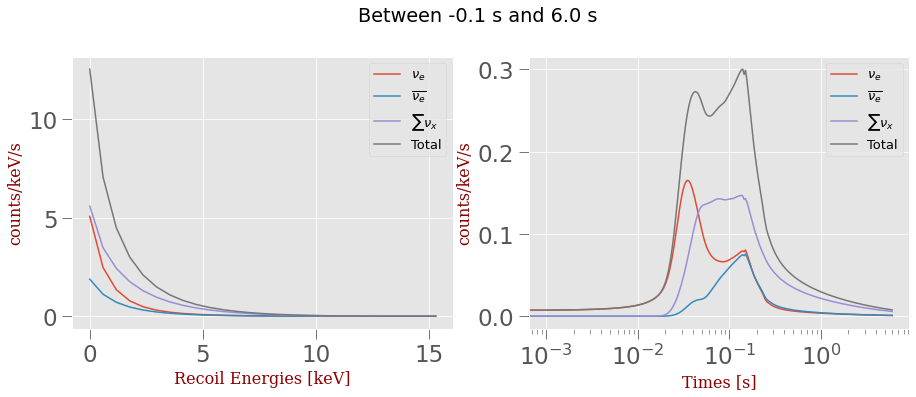

In [8]:
plotter.plot_recoil_spectra2D(integrated=True, figsize=(15,5));
plotter.plot_recoil_spectra2D(integrated=True, t0=0, tf=6, figsize=(15,5));

#### 1D recoil spectra calculated from 2D spectra

It is possible to calculate rates along time and/or energy axis simply by integrating over the other using 2D spectra.

In [9]:
spec_Er, spec_t = M30sn_model._get_1Drates_from2D()

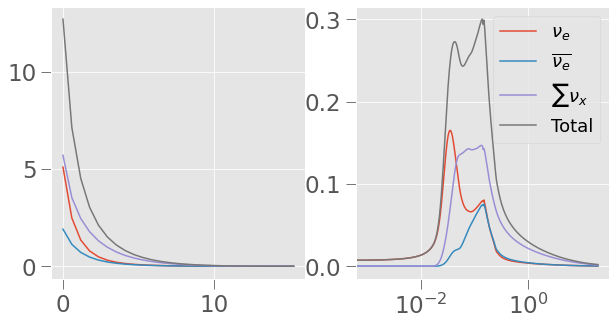

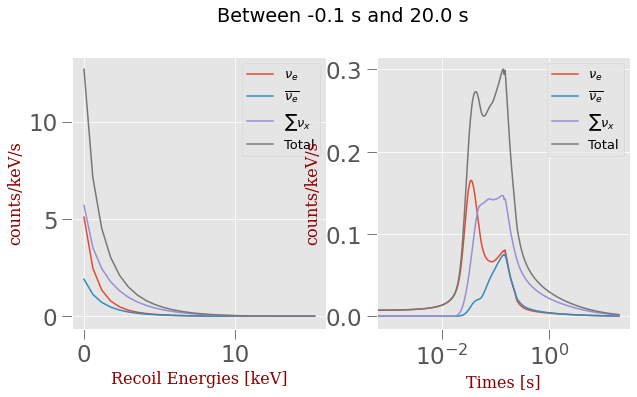

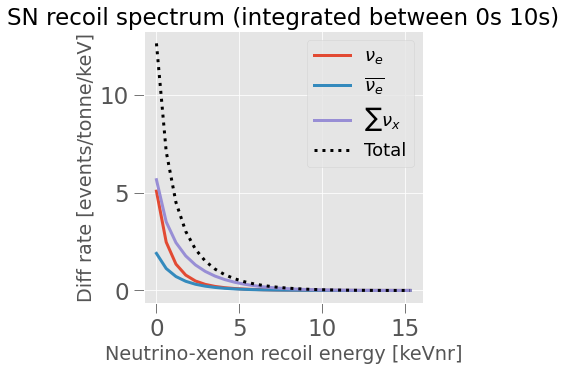

In [10]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
for k,v in spec_Er.items():
    ax1.plot(M30sn_model.recoil_en, v, label=k)
for k,v in spec_t.items():
    ax2.semilogx(M30sn_model.t, v, label=k)
plt.legend();

# compare with the directly calculated one
plotter.plot_recoil_spectra2D(integrated=True, figsize=(10,5));
plotter.plot_recoil_spectra(figsize=(5,5));

#### Recoil Energy Spectrum 3D plots

For the following to work properly, one needs to invoke `%matplotlib notebook` magic command.

In [12]:
%matplotlib notebook

_**2D rates of each individual flavor**_

<IPython.core.display.Javascript object>


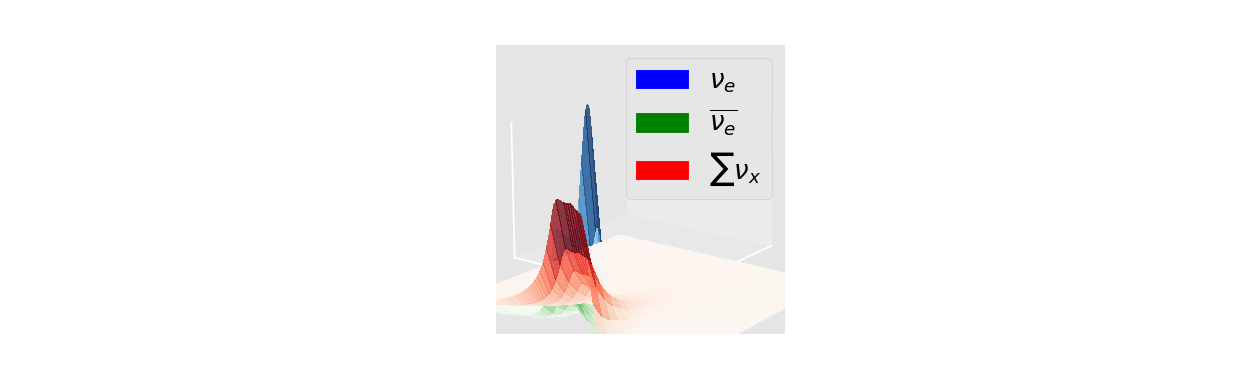

/home/melih/software/multimessenger/multimessenger/supernova/SN_plotter.py:463: RuntimeWarning: divide by zero encountered in log10
  X, Y = np.meshgrid(Ebins, np.log10(tbins))
/home/melih/software/multimessenger/multimessenger/supernova/SN_plotter.py:463: RuntimeWarning: invalid value encountered in log10
  X, Y = np.meshgrid(Ebins, np.log10(tbins))


In [13]:
f, ax = plotter.plot_recoil_spectra3D(total=False)
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([]); ax.set_xlabel(''); ax.set_ylabel(''); ax.set_zlabel('');

_**2D rates of the total flux**_

<IPython.core.display.Javascript object>


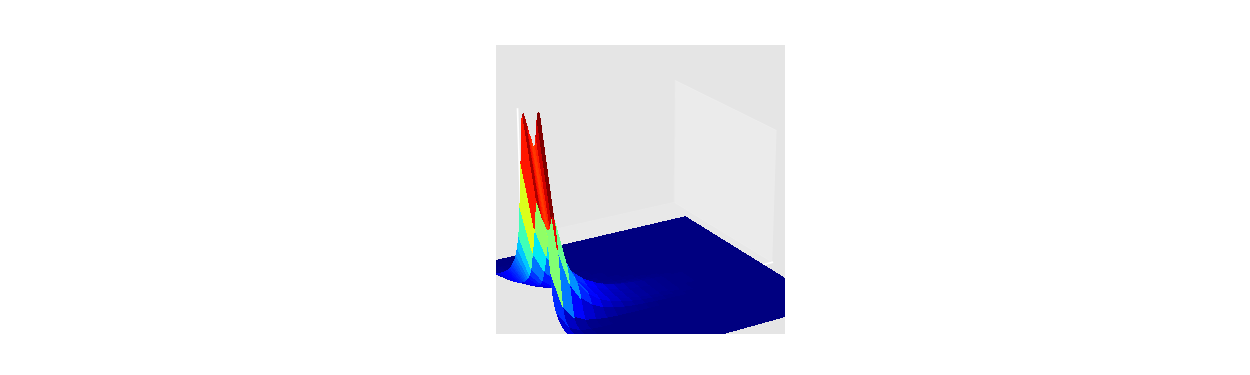

In [14]:
fig, ax = plotter.plot_recoil_spectra3D(total=True)
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([]); ax.set_xlabel(''); ax.set_ylabel(''); ax.set_zlabel('');

---